In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 8.3 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=6e3cb8f54d726b3faf87c23413778fe56b3919b2d6026d1b0ee6f30ef9c7065b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
!pip install jovian

     |████████████████████████████████| 68 kB 3.1 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6501 sha256=ab47c60d99ac28e123a045e48599c7cf7c3bb106a716442a354bb53463ca101d
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [ ]:
!pip3 install face_recognition
import face_recognition
import glob
import cv2
import numpy as np
import jovian

In [ ]:
paths = glob.glob('/gdrive/MyDrive/data/*.jpg')
names = []
images = []
image_encodings = []
image_names = []
count_img = 0
for i in paths:
    images.append(face_recognition.load_image_file(i))
    image_encodings.append(face_recognition.face_encodings(images[count_img])[0])
    image_names.append(i.split('/')[-1].split('.jpg')[0])
    count_img+=1
    print(image_names)

['jeff bezos']
['jeff bezos', 'donald trump']
['jeff bezos', 'donald trump', 'obama']
['jeff bezos', 'donald trump', 'obama', 'elon musk']
['jeff bezos', 'donald trump', 'obama', 'elon musk', 'bill gates']
['jeff bezos', 'donald trump', 'obama', 'elon musk', 'bill gates', 'snehit2']


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


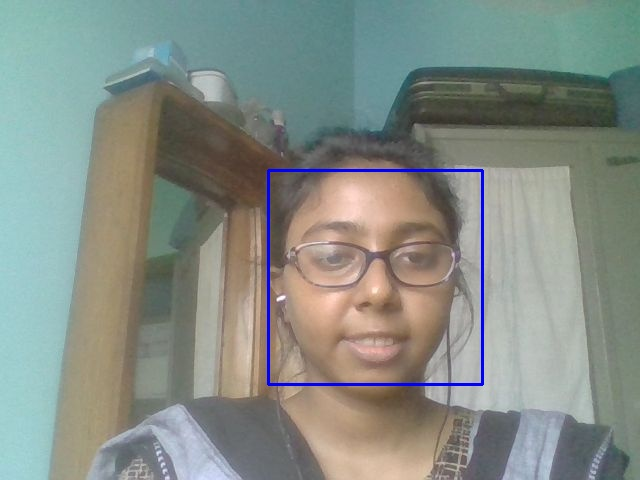

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from PIL import Image
import face_recognition

image = face_recognition.load_image_file('/content/photo.jpg')
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
    top, right, bottom, left = face_location

    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    # pil_image.show()
    pil_image.save(f'{top}.jpg')

In [ ]:
import face_recognition

image = face_recognition.load_image_file('/content/photo.jpg')
face_locations = face_recognition.face_locations(image)

# Array of coords of each face
# print(face_locations)

print(f'There are {len(face_locations)} people in this image')

There are 1 people in this image


In [ ]:
import face_recognition

image_of_bill = face_recognition.load_image_file('/gdrive/MyDrive/data/bill gates.jpg')
bill_face_encoding = face_recognition.face_encodings(image_of_bill)[0]

unknown_image = face_recognition.load_image_file(
    '/content/photo.jpg')
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

# Compare faces
results = face_recognition.compare_faces(
    [bill_face_encoding], unknown_face_encoding)

if results[0]:
    print('This is Bill Gates')
else:
    print('This is NOT Bill Gates')

This is NOT Bill Gates
